In [32]:
import numpy as np

In [1]:
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect("factbook.db")

In [3]:
q1 = "SELECT * FROM sqlite_master WHERE type='table';"

In [4]:
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [5]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [6]:
# Query that will return the (table: facts)
# 1. Maximum Population
# 2. Minimum Population
# 3. Maximum Population Growth
# 4. Minimum Population Growth
q3 = """
    SELECT  MAX(population),
            MIN(population),
            MAX(population_growth),
            MIN(population_growth)
    FROM facts;
"""
pd.read_sql_query(q3, conn)

,MAX(population),MIN(population),MAX(population_growth),MIN(population_growth)
0,7256490011,0,4.02,0.0


There's a country with 7.2 billion population.

There's also a country with 0 population.

Let's find those countries.

In [7]:
q4 = """
SELECT name, population
FROM facts
WHERE (population = (SELECT MAX(population)
                     FROM facts)) OR
      (population = (SELECT MIN(population)
                     FROM facts));
"""
pd.read_sql_query(q4, conn)

,name,population
0,Antarctica,0
1,World,7256490011


**It is obvious that these two entries have population count associated with them as such.**

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa12280a128>,
      dtype=object)

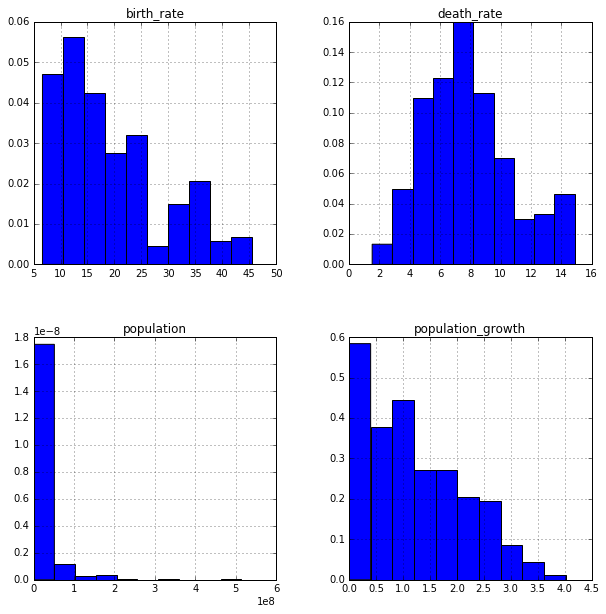

In [13]:
# non-outlier rows
q5 = """
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE (population < 1000000000) AND --less than 1 billion
      (population > 1000);
"""
fig, ax = plt.subplots(figsize=(10,10))
pd.read_sql_query(q5, conn).hist(ax=ax, normed=True)

### Highest Population density

In [27]:
# population density for all countries.
q6 = """SELECT name, CAST(population AS float)/area_land as pop_density
        FROM facts
        WHERE   (population > 0) AND
                (area_land > 0)
        ORDER BY CAST(population AS float)/area_land DESC"""
pop_density = pd.read_sql_query(q6, conn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa12247ce48>]],
      dtype=object)

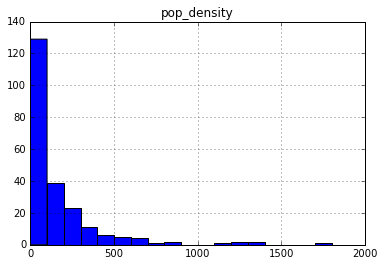

In [34]:
pop_density[pop_density.pop_density < 2500].hist(bins=np.arange(0,2000,100))

In [37]:
pop_density[pop_density.pop_density > 1000]#.hist(bins=20)

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


**More than 120 countires(ie. more that 50% of total countries) have population density below 100.**

**While there are very few countries with density greater than 2500.**


In [56]:
# Highest ratio of area under water to land area
q7 = """
SELECT * FROM (
SELECT name, CAST(area_water AS float)/area_land as water_to_land
FROM facts )
ORDER BY water_to_land DESC;
"""
pd.read_sql_query(q7, conn).head(10)

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240
